In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import scipy.stats as stats
from math import ceil

In [2]:
filename = Path('./data/processed/20210818_evening_staff_activities.csv')
df = pd.read_csv(filename, parse_dates=['start_time', 'end_time'])

activity_times = np.array((df['end_time'] - df['start_time'])/np.timedelta64(1, 's'))

(array([0.0337126 , 0.04635483, 0.02889651, 0.02107038, 0.01866233,
        0.01324424, 0.01023418, 0.00782614, 0.0114382 , 0.0054181 ,
        0.00481609, 0.00120402, 0.00301005, 0.00060201, 0.00361206,
        0.00120402, 0.00361206, 0.00240804, 0.00301005, 0.00180603,
        0.00060201, 0.00180603, 0.00120402, 0.        , 0.00120402,
        0.00060201, 0.00120402, 0.00060201, 0.        , 0.00060201,
        0.        , 0.        , 0.00060201, 0.00060201, 0.00060201,
        0.        , 0.00120402, 0.00060201, 0.        , 0.        ,
        0.        , 0.        , 0.00060201, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00060201, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00060201, 0.        , 0.  

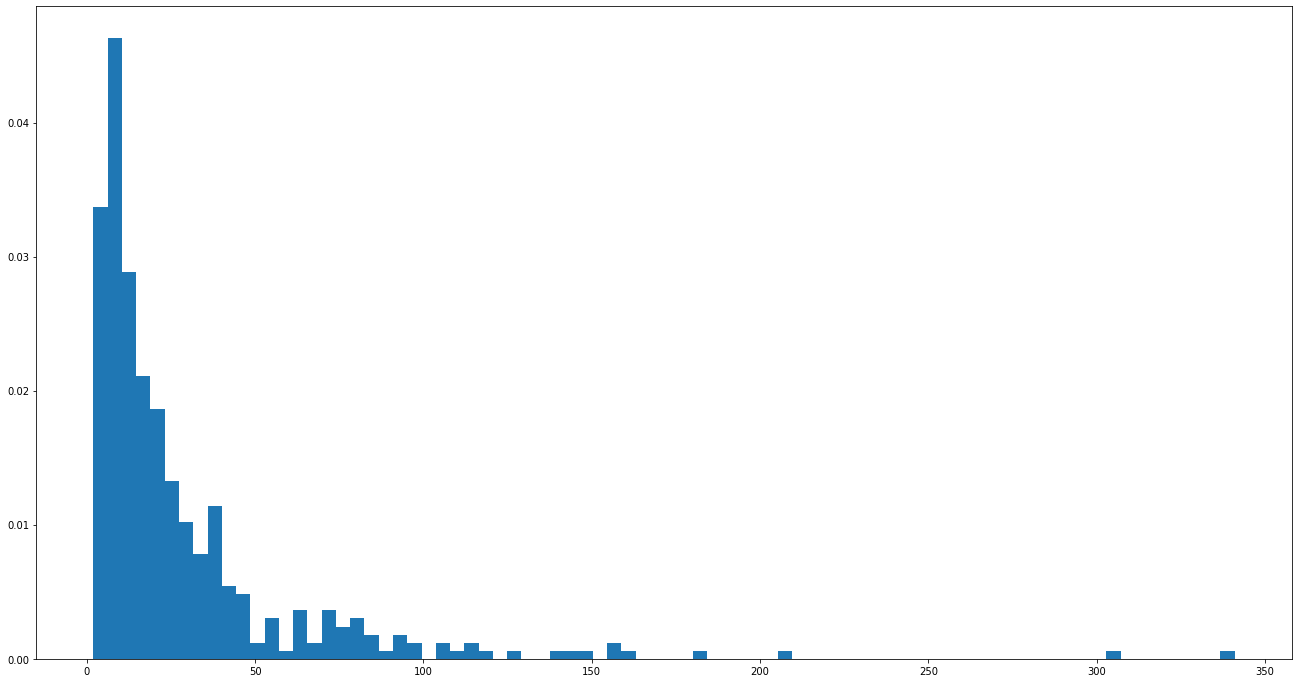

In [3]:
plt.rcParams['figure.figsize'] = [22.5,12]

plt.hist(activity_times, bins=80, density=True)

In [4]:
def process_line(line):
    line = line.strip()
    start_ind = 0
    parts = []
    for ii in range(3):
        comma_index = line.find(',', start_ind)
        value = line[start_ind:comma_index].strip()
        if ii == 1 or ii == 2:
            value = float(value)        
        start_ind = comma_index + 1
        parts.append(value)
        
    parts.append(ast.literal_eval(line[start_ind:].strip()))
    return parts

with open(Path('./data/stats/activitiy_time_fits.txt'), 'r') as f:
    lines = [process_line(line) for line in f if '#' not in line]

min_value = min(activity_times)
max_value = max(activity_times)    
    
distrs = []
name_length_max = 0
for ii, distr_data in enumerate(lines):
    res = stats.cramervonmises(activity_times, distr_data[0], args=distr_data[3])
    dist = getattr(stats, distr_data[0])(*distr_data[3])
    distrs.append((distr_data[0], distr_data[2], res.pvalue, distr_data[3]))
    if len(distr_data[0]) > name_length_max:
        name_length_max = len(distr_data[0])

distrs.sort(key=lambda el: el[2], reverse=True)        
    
for name, ks_p_value, cvm_p_value, params in distrs:    
    print(f'{name:>{name_length_max}s} - {ks_p_value:.4f} - {cvm_p_value:.4f} - {len(params)}')

C:\Users\martijnsparnaa\Anaconda3\envs\nomad_experiments\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.72995079).
  warnings.warn(
C:\Users\martijnsparnaa\Anaconda3\envs\nomad_experiments\lib\site-packages\scipy\stats\_continuous_distns.py:4460: RuntimeWarning: overflow encountered in exp
  np.exp(x*kapinv)*(kappa/kappkapinv))


     genhyperbolic - 0.4722 - 0.8699 - 5
       geninvgauss - 0.4900 - 0.8587 - 4
         johnsonsu - 0.4248 - 0.7613 - 4
           lognorm - 0.4301 - 0.7588 - 3
          invgauss - 0.3807 - 0.7575 - 3
         exponweib - 0.4121 - 0.7453 - 4
      powerlognorm - 0.4104 - 0.7377 - 4
      norminvgauss - 0.4110 - 0.7333 - 4
         johnsonsb - 0.3738 - 0.7186 - 4
              fisk - 0.5188 - 0.7146 - 3
               ncf - 0.4608 - 0.6515 - 5
         betaprime - 0.3892 - 0.6410 - 4
                 f - 0.3720 - 0.6329 - 4
          invgamma - 0.5455 - 0.6323 - 3
        genextreme - 0.5390 - 0.5867 - 3
        invweibull - 0.5389 - 0.5867 - 3
            burr12 - 0.3305 - 0.5798 - 4
               nct - 0.4816 - 0.4990 - 4
        foldcauchy - 0.3696 - 0.4726 - 3
           gilbrat - 0.2714 - 0.4644 - 2
 studentized_range - 0.2780 - 0.4515 - 4
            kappa3 - 0.1577 - 0.4451 - 3
              burr - 0.0988 - 0.4134 - 4
            mielke - 0.1237 - 0.4087 - 4
       fatigueli

C:\Users\martijnsparnaa\Anaconda3\envs\nomad_experiments\lib\site-packages\scipy\stats\_continuous_distns.py:108: RuntimeWarning: floating point number truncated to an integer
  return scu._smirnovc(n, x)


2.0
341.0


C:\Users\martijnsparnaa\Anaconda3\envs\nomad_experiments\lib\site-packages\scipy\stats\_continuous_distns.py:3094: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
C:\Users\martijnsparnaa\Anaconda3\envs\nomad_experiments\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.72995079).
  warnings.warn(
C:\Users\martijnsparnaa\Anaconda3\envs\nomad_experiments\lib\site-packages\scipy\stats\_continuous_distns.py:114: RuntimeWarning: floating point number truncated to an integer
  return scu._smirnovci(n, q)
C:\Users\martijnsparnaa\Anaconda3\envs\nomad_experiments\lib\site-packages\scipy\stats\_continuous_distns.py:105: RuntimeWa

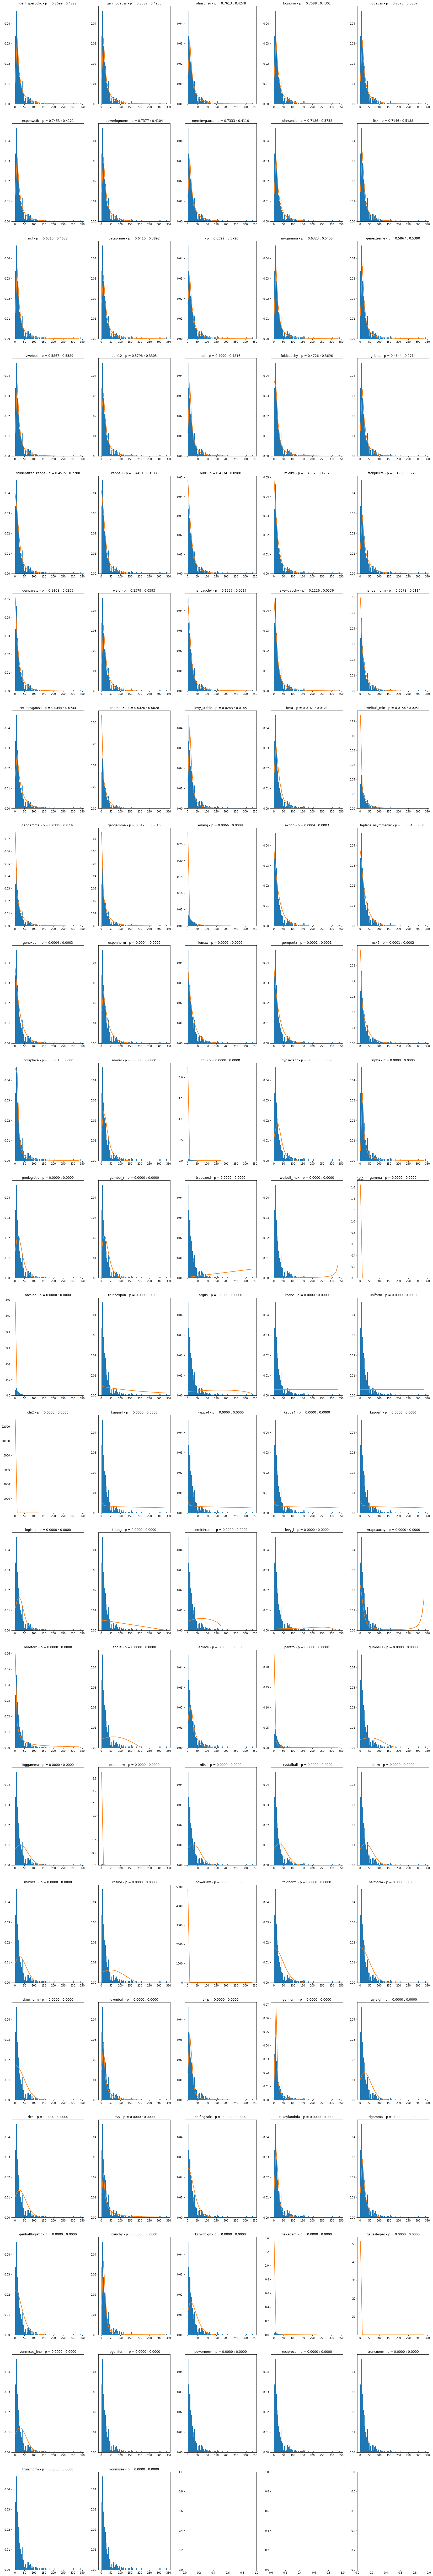

In [5]:
plt.rcParams['figure.figsize'] = [28.5,180]

col_count = 5
row_count = int(ceil(len(lines)/col_count))
_, axes = plt.subplots(row_count, col_count)

axes = axes.flatten()

import scipy.stats as stats

min_value = min(activity_times)
max_value = max(activity_times)
diff_value = max_value - min_value

print(min_value)
print(max_value)

#min_value -= diff_value*0.1
#max_value += diff_value*0.1

x_per_lim = 0.001

for ii, distr_data in enumerate(distrs):
    name, ks_p_value, cvm_p_value, params = distr_data
    hist = axes[ii].hist(activity_times, bins=80, density=True)
    dist = getattr(stats, name)(*params)
    x = np.arange(max(min_value, dist.ppf(x_per_lim)), min(max_value,dist.ppf(1-x_per_lim)), 10)
    axes[ii].plot(x, dist.pdf(x), linewidth=2)
    axes[ii].set_title(f'{name} - p = {cvm_p_value:.4f} : {ks_p_value:.4f}')